In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from engine import Value
from utils import *

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

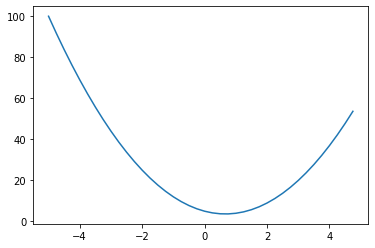

In [5]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

plt.plot(xs, ys)

In [6]:
# f(x) = 3x^2 - 4x + 5
# f'(x)
h = 0.001
x = 3.0
print(f"f({x}): {f(x)}")
df = (f(x+h) - f(x))/h

print(f"df: {df}")

f(3.0): 20.0
df: 14.00300000000243


In [7]:
a = Value(2.0, label='a')
print(a)
b = Value(3.0, label='b')
print(b) 
c = Value(10.0, label='c')

Value(data=2.0)
Value(data=3.0)


Value(data=5.0)
Value(data=2.0)
Value(data=3.0)


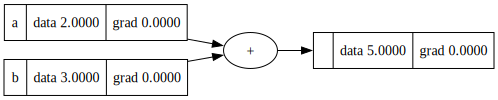

In [8]:
t = a + b
draw_dot(t)

In [9]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

Value(data=-8.0)
Value(data=-2.0)
Value(data=4.0)
Value(data=-6.0)
Value(data=-3.0)
Value(data=2.0)
Value(data=10.0)


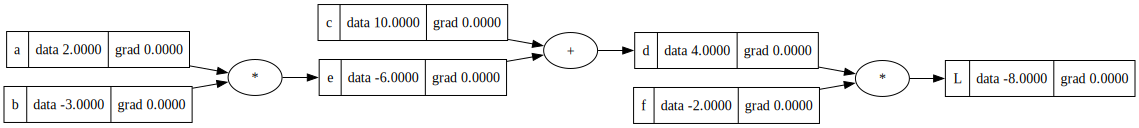

In [10]:
draw_dot(L)

In [11]:
from main import temp_func

Value(data=0.7071067811865477)
Value(data=4.828427124746192)
Value(data=-1)
Value(data=5.828427124746192)
Value(data=1.7627471740390863)
Value(data=0.8813735870195432)
Value(data=6.881373587019543)
Value(data=-6.0)
Value(data=0.0)
Value(data=1.0)
Value(data=0.0)
Value(data=-6.0)
Value(data=2.0)
Value(data=-3.0)
Value(data=2)
Value(data=0.1464466094067262)
Value(data=6.828427124746192)
Value(data=1)


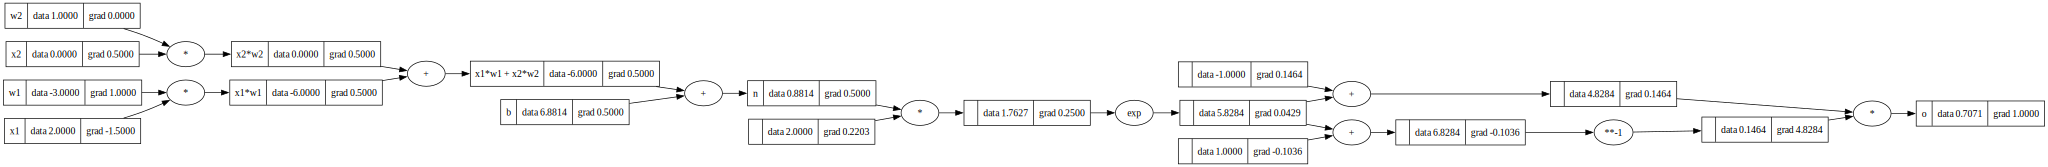

In [12]:
# inputs 
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias
b = Value(6.8813735870195432, label="b")
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label='n'
# o = n.tanh(); o.label="o"
# use the exp() function
e = (2 * n).exp()
o = (e - 1) / (e + 1); o.label = "o"
o.backward()

draw_dot(o)

Value(data=0.7071067811865477)
Value(data=4.828427124746192)
Value(data=-1)
Value(data=5.828427124746192)
Value(data=1.7627471740390863)
Value(data=0.8813735870195432)
Value(data=6.881373587019543)
Value(data=-6.0)
Value(data=0.0)
Value(data=1.0)
Value(data=0.0)
Value(data=-6.0)
Value(data=2.0)
Value(data=-3.0)
Value(data=2)
Value(data=0.1464466094067262)
Value(data=6.828427124746192)
Value(data=1)


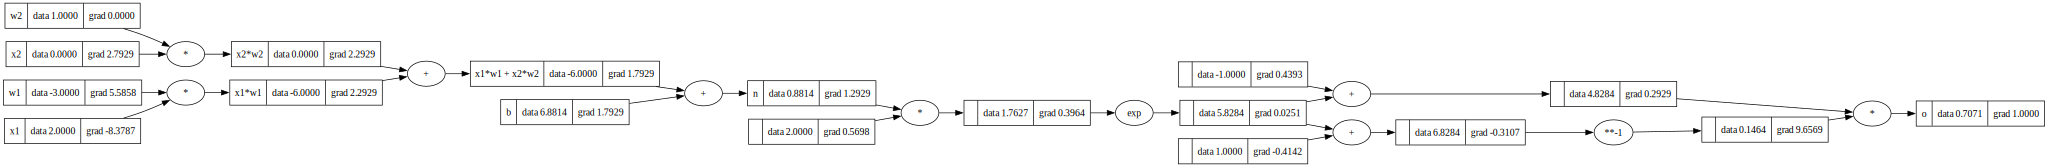

In [13]:
o.backward()
draw_dot(o)

Value(data=6.0)
Value(data=3.0)


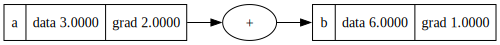

In [14]:
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)

Value(data=-6.0)
Value(data=-6.0)
Value(data=3.0)
Value(data=-2.0)
Value(data=1.0)


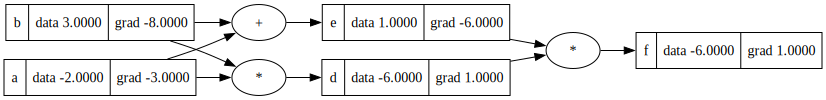

In [15]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)

In [16]:
a = Value(2.0)
2 * a

Value(data=4.0)

In [17]:
2 - a

Value(data=0.0)

In [18]:
b = Value(4.0)
print(a/b)

Value(data=0.5)


In [19]:
b - a

Value(data=2.0)

In [20]:
from engine import MLP

In [ ]:
#### MLP examples
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

net = MLP(3, [4, 4, 1])



In [22]:
print(ypred)

[Value(data=-0.05217496336815789), Value(data=-0.35234986944302804), Value(data=0.3733217161901534), Value(data=0.5669906561578923)]


In [23]:
# calculate the loss
loss = [(y_true - y_pred)**2 for y_true, y_pred in zip(ys, ypred)]
final_loss = sum(loss)
print(final_loss)

Value(data=3.600032473163288)


In [24]:
final_loss.backward()

In [25]:
net.layers[0].neurons[0].w[0].grad

2.316719014136879

In [26]:
len(net.parameters())

41

In [28]:
for i in range(3):
    for p in net.parameters():
        p.data += -0.001 * p.grad
    ypred = [net(x) for x in xs]
    loss = [(y_true - y_pred)**2 for y_true, y_pred in zip(ys, ypred)]
    final_loss = sum(loss)
    final_loss.backward()
    print(final_loss)

Value(data=3.5558049249074775)
Value(data=3.4685478818899167)
Value(data=3.34068119208623)
